<h1 style= font-size:3rem;color:red;>Educational Attainment’s Effect on Educational Homogamy in the United States </h1>

The dataset used in this homework is created by Institute for Social Research- Survey Research Center. It is gathered within the scope of The Panel Study of Income Dynamics (PSID), which is the longest running longitudinal household survey in the world. It offers significant insights into the work and household dynamics of married women in the United States. \
The sample consists of 753 observations, it provides a comprehensive view of various factors that influence work patterns and family dynamics. \
I've chosen this dataset to examine homogamy in the US in 1970s since it provides insights about employment, income, education level of spouses and the family background of women. 

In [1]:
## Import the Necessary Libraries for Analysis
# Import Pandas
import pandas as pd # data processing
# Import Matplotlib
import matplotlib.pyplot as plt
# Import SeaBorn 
import seaborn as sns
# Import numpy
import numpy as np
# Import statmodels
import statsmodels.api as sm

In [2]:
## I load CSV Dataset, name it woman_data
woman_data = pd.read_csv('~/Desktop/Life expectation Project/Mroz.csv')
del(woman_data['Unnamed: 0']) # I delete an unnecessary column
# Let's have a look at the dataframe
woman_data.head()

,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
0,yes,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,12,7,5.0,no,14
1,yes,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,7,7,11.0,yes,5
2,yes,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,12,7,5.0,no,15
3,yes,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,7,7,5.0,no,6
4,yes,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,12,14,9.5,yes,7


I wrote the explanations of each variable here to check it when needed.
#### Explanations of variables 

**hoursw**
: Wife's hours of work in 1975

**child6**
: Number of children less than 6 years old in household

**child618**
: Number of children between ages 6 and 18 in household

**agew**
: Wife's Age

**educw**
: Wife's educational attainment, in years

**hearnw**
: Wife's average hourly earnings, in 1975 dollars

**wagew**
: Wife's wage reported at the time of the 1976 interview

**hoursh**
: Husband's hours worked in 1975

**ageh**
: Husband's Age

**wageh**
: Husband's wage, in 1975 dollars

**income**
: Family income, in 1975, dollars

**educwm**
: Wife's mother's educational attainment, in years

**educwf**
: Wife's father's educational attainment, in years

**unemprate**
: Unemployment rate in county of residence, in percentage points

**city**
: Lives in a large city (SMSA)

**experience**
: Actual years of wife's previous labor market experience

In [3]:
#Learn what is the number of rows and columns in data to get to know the dataset better before dwelling into it.
woman_data.shape

(753, 18)

In [4]:
# Learn if there is any null and examine the data types whether they are integer or float etc. 
woman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   work        753 non-null    object 
 1   hoursw      753 non-null    int64  
 2   child6      753 non-null    int64  
 3   child618    753 non-null    int64  
 4   agew        753 non-null    int64  
 5   educw       753 non-null    int64  
 6   hearnw      753 non-null    float64
 7   wagew       753 non-null    float64
 8   hoursh      753 non-null    int64  
 9   ageh        753 non-null    int64  
 10  educh       753 non-null    int64  
 11  wageh       753 non-null    float64
 12  income      753 non-null    int64  
 13  educwm      753 non-null    int64  
 14  educwf      753 non-null    int64  
 15  unemprate   753 non-null    float64
 16  city        753 non-null    object 
 17  experience  753 non-null    int64  
dtypes: float64(4), int64(12), object(2)
memory usage: 106.0+ KB


As we can see here, there is no missing values that I should remove from the dataframe.  

#### Finding the minimum and maximum values for educw and educh
I want to classify the educational achievements into 5 levels based on the education levels in the US in 1970s and the required time to finish them. Before that I should know the minimum and maximum of respondent's years of education (and their spouses' years of education) to see if the dataset contains individuals with diverse education levels.

In [5]:
# Find the minimum value for each variable in the dataset (what is important for us is only educw and educh variables)
woman_data.apply(np.min)

work              no
hoursw             0
child6             0
child618           0
agew              30
educw              5
hearnw           0.0
wagew            0.0
hoursh           175
ageh              30
educh              3
wageh         0.4121
income          1500
educwm             0
educwf             0
unemprate        3.0
city              no
experience         0
dtype: object

In [6]:
# Find the minimum value for each variable in the dataset
woman_data.apply(np.max)

work             yes
hoursw          4950
child6             3
child618           8
agew              60
educw             17
hearnw          25.0
wagew           9.98
hoursh          5010
ageh              60
educh             17
wageh         40.509
income         96000
educwm            17
educwf            17
unemprate       14.0
city             yes
experience        45
dtype: object

As we can see above, the minimum year of education for women (educw) in this dataset is 5 and maximum is 17. The minimum year of education for men (educh) in the dataset is 3 and maximum is 17.

#### Correlation Heat Map
I aim to understand if there is a correlation between some factors which are correlated with the education level of women and education level of men. It is necessary to see the correlated factors so that I can select the instrumental variables and the variables I should control for the regression.  

Below, you can see the correlation heat map. 

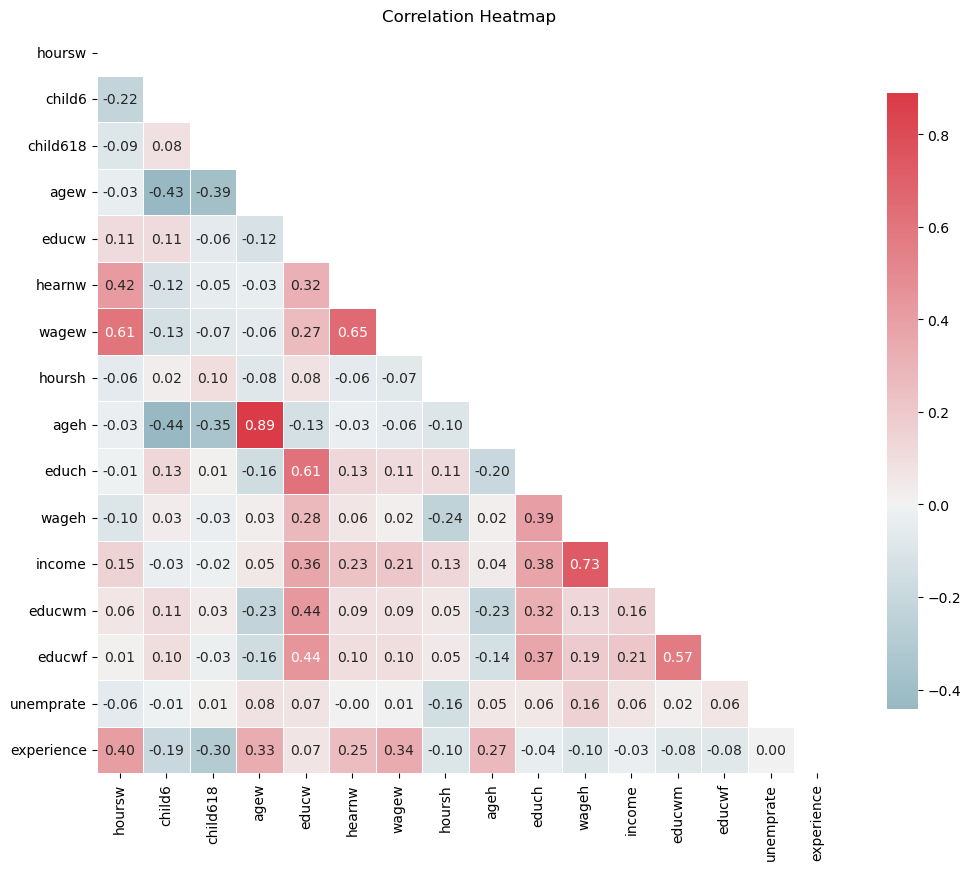

In [7]:
# Create the correlation matrix
corr_matrix = woman_data.corr()

# I create a mask for the upper triangle meaning that I hide the upper triangle to hide duplicate entries.
# For this purpose, I use np.triu() here and show only the lower triangle part of correlation matrix.
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

# and create the matplotlib figure (initialize the size of the figure)
fig, ax = plt.subplots(figsize=(12, 10))

# then generate the colormap (ranging from color number 220 to 10, showing the positive (red) and negative (blue) correlations)
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Lastly, create the heatmap
# I say annot=True, so that I show the correlation values on the map
# fmt=".2f" so that I show two decimal places of the correlation values
# center=0, so the center of colormap is set to 0.
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

# Title of the plot
plt.title('Correlation Heatmap')

# Let's see the plot
plt.show()

#### Interpretation of the Correlation Heat Map
As we can see on the heatmap, variables that are highly correlated with educw and educh are educwf, educwm, income and wageh, all of them are positively correlated. It means that these values will be controlled in the regression analysis to control for the endogeniety problem. 

#### Classifying Educational Attainment

There are 5 levels of education in the US in 1970s. The education levels and the number of years required for attainment are as follows: 

***Elementary School***- 5 years 

***Middle School***- 8 years

***High School***- 12 years

***Undergraduate Degree***- 16 years

***Masters Degree***- 17 years

In [8]:
# I first define a function to classify educational attainment based on the education system of the US. 
def cl_educ(education_years):
    if education_years <= 5:
        return "Elementary school"
    elif 6 <= education_years <= 8:
        return "Middle school"
    elif 9 <= education_years <= 12:
        return "High school"
    elif 13 <= education_years <= 16:
        return "Undergraduate degree"
    elif education_years == 17:
        return "Masters degree"
    else:
        return "Unknown"

# Then I apply the classification function to 'education_level_w' and 'education_level_h' variables
woman_data['education_level_w'] = woman_data['educw'].apply(cl_educ)
woman_data['education_level_h'] = woman_data['educh'].apply(cl_educ)

# and I give numerical order to the education levels for further analysis so that I can find the difference in educational attainment between each husband and wife
education_map = {
    "Elementary school": 1,
    "Middle school": 2,
    "High school": 3,
    "Undergraduate degree": 4,
    "Masters degree": 5,
    "Unknown": -1  
}
woman_data['education_level_w'] = woman_data['education_level_w'].map(education_map)
woman_data['education_level_h'] = woman_data['education_level_h'].map(education_map)

# I calculate the difference in educational attainment, name the variable 'education_diff'
woman_data['education_diff'] = woman_data['education_level_h'] - woman_data['education_level_w']

# I don't want any result that is below 0, which is meaningless, so I set negative differences to their absolute values
woman_data['education_diff'] = woman_data['education_diff'].abs()

# The maximum difference between education levels is 4, minimum is 0, I restrict the difference to be between 0 and 4
woman_data['education_diff'] = np.where(woman_data['education_diff'] < 0, 0, woman_data['education_diff'])
woman_data['education_diff'] = np.where(woman_data['education_diff'] > 4, 4, woman_data['education_diff'])

#### Plot a Histogram

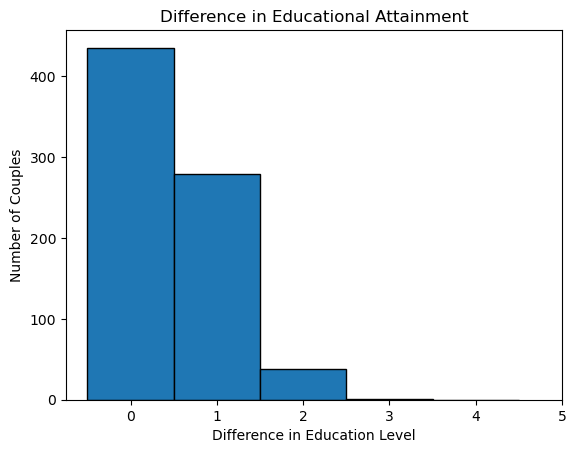

In [9]:
# To see the distribution of difference in education levels among spouses, I plot a histogram
plt.hist(woman_data['education_diff'], bins=range(0, 6), align='left', edgecolor='black')
plt.xticks(range(0, 6))
plt.xlabel('Difference in Education Level')
plt.ylabel('Number of Couples')
plt.title('Difference in Educational Attainment')
plt.show()

The histogram shows us that education levels of spouses in the US are mostly the same. Homogamy is present!

#### Does it change depending on where people live? Comparison of Educational Differences of Spouses based on where they live (Rural vs. Urban)

/var/folders/_x/d1qc8fqj21qb7l4mspg9km980000gn/T/ipykernel_61654/1345960372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data.loc[:, 'education_diff_city'] = city_data['education_level_h'] - city_data['education_level_w']
/var/folders/_x/d1qc8fqj21qb7l4mspg9km980000gn/T/ipykernel_61654/1345960372.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_city_data.loc[:, 'education_diff_ru'] = non_city_data['education_level_h'] - non_city_data['education_level_w']
/var/folders/_x/d1qc8fqj21qb7l4msp

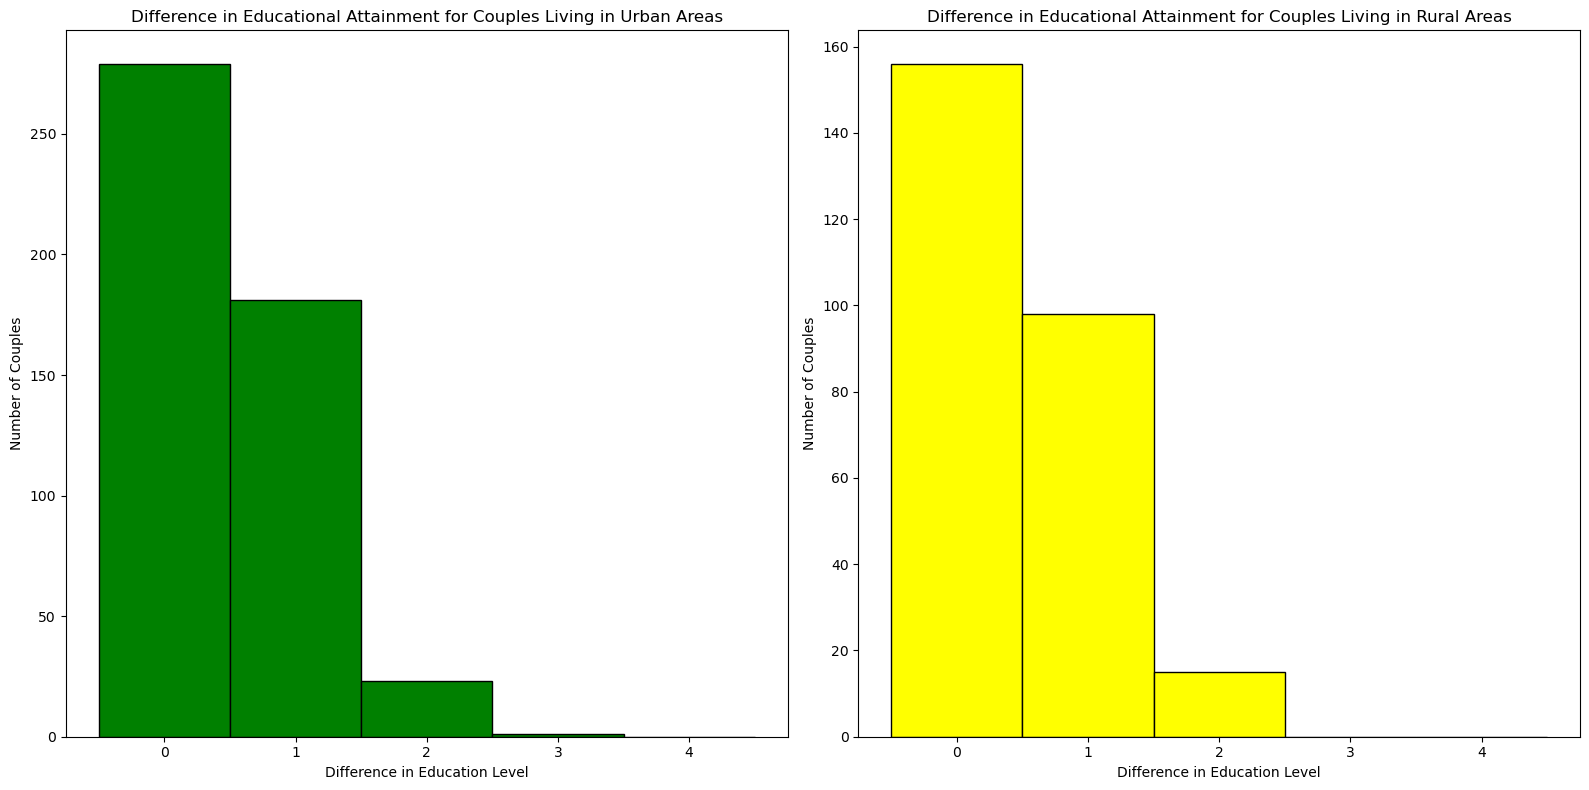

In [17]:
# I separate the DataFrame into subsets for individuals living in the city and rural areas based on 'city' variable, which is a binary variable
city_data = woman_data[woman_data['city'] == 'yes']
non_city_data = woman_data[woman_data['city'] == 'no']

# Then calculate the difference in educational attainment for both subsets
# I used .loc below to index based on the label on column names education_diff_city, the same for education_diff_ru
city_data.loc[:, 'education_diff_city'] = city_data['education_level_h'] - city_data['education_level_w']
non_city_data.loc[:, 'education_diff_ru'] = non_city_data['education_level_h'] - non_city_data['education_level_w']

# I set negative differences to their absolute values
city_data.loc[:, 'education_diff_city'] = city_data['education_diff_city'].abs()
non_city_data.loc[:, 'education_diff_ru'] = non_city_data['education_diff_ru'].abs()

# and restrict the difference to be between 0 and 4
city_data.loc[:, 'education_diff_city'] = np.clip(city_data['education_diff_city'], 0, 4)
non_city_data.loc[:, 'education_diff_ru'] = np.clip(non_city_data['education_diff_ru'], 0, 4)

# I plot two histograms side by side to see the difference based on location
plt.figure(figsize=(16, 8))

# Histogram for spouses living in the city
plt.subplot(1, 2, 1)
plt.hist(city_data['education_diff_city'], color = 'green',bins=range(6), align='left', edgecolor='black')
plt.xticks(range(5))
plt.xlabel('Difference in Education Level')
plt.ylabel('Number of Couples')
plt.title('Difference in Educational Attainment for Couples Living in Urban Areas')

# Histogram for spouses living in the rural areas
plt.subplot(1, 2, 2)
plt.hist(non_city_data['education_diff_ru'],color = 'yellow', bins=range(6), align='left', edgecolor='black')
plt.xticks(range(5))
plt.xlabel('Difference in Education Level')
plt.ylabel('Number of Couples')
plt.title('Difference in Educational Attainment for Couples Living in Rural Areas')

plt.tight_layout()
plt.show()

In [11]:
# To make the analysis more detailed, I calculate the percentage of spouses with educational level difference zero in Urban Areas
total_individuals_city_data = city_data.shape[0]
print("Total number of individual units in city_data:", total_individuals_city_data)
yes_count_homogamy = city_data['education_diff'].value_counts()[0]
print("Number of 'yes' answers for homogamy in city_data:", yes_count_homogamy)

perc_homogamy_c = yes_count_homogamy * 100 / total_individuals_city_data
print("Percentage of educational homogamy in the city is", perc_homogamy_c)

Total number of individual units in city_data: 484
Number of 'yes' answers for homogamy in city_data: 279
Percentage of educational homogamy in the city is 57.64462809917355


In [12]:
# The same for Spouses Living in Rural Areas
total_individuals_non_city_data = non_city_data.shape[0]
print("Total number of individual units in non_city_data:", total_individuals_non_city_data)
yes_count_homogamy_r = non_city_data['education_diff'].value_counts()[0]
print("Number of 'yes' answers for homogamy in non_city_data:", yes_count_homogamy_r)

perc_homogamy_r = yes_count_homogamy_r * 100 / total_individuals_non_city_data
print("Percentage of educational homogamy in the rural areas is", perc_homogamy_r)

Total number of individual units in non_city_data: 269
Number of 'yes' answers for homogamy in non_city_data: 156
Percentage of educational homogamy in the rural areas is 57.99256505576208


 As it can be seen above that there is no difference based on Rural vs. Urban Areas.

#### The Distribution of Spouses with Educational Attainment Difference Zero based on their Education Level

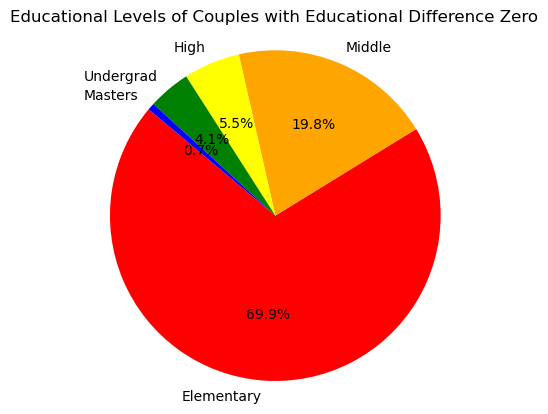

In [13]:
# I filter the DataFrame to have only couples with educational_diff == 0
couples_with_zero_diff = woman_data[woman_data['education_diff'] == 0]

# Then count the number of couples at each educational level
education_level_counts = couples_with_zero_diff['education_level_w'].value_counts()

# Lastly, I plot a pie chart to visualize the distribution of education levels for couples with educational homogamy
education_levels = ["Elementary", "Middle", "High", "Undergrad", "Masters"]
colors = ['red', 'orange', 'yellow', 'green', 'blue']

plt.pie(education_level_counts, labels=education_levels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Educational Levels of Couples with Educational Difference Zero')
plt.show()

As it can be seen on the pie chart, the largest education level group among the couples with 0 difference in their education levels is the lowest education level group, which is elementary school.

In [14]:
# I aim to create a variable namely 'educ_par' that stands for education level of parents of women. 
# First, I convert variables to numeric data types
woman_data['educwm'] = pd.to_numeric(woman_data['educwm'])
woman_data['educwf'] = pd.to_numeric(woman_data['educwf'])

# then aggregate educwm and educwf into educpar
woman_data['educpar'] = woman_data[['educwm', 'educwf']].max(axis=1)

In [15]:
# I created a variable,'homogamy', which is a binary variable that says True for educational difference 0, and else False.
woman_data['homogamy'] = np.where(woman_data['education_diff'] == False, True, False)

# Take a look at the dataframe to check if everything is going as expected.
woman_data


,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,...,educwm,educwf,unemprate,city,experience,education_level_w,education_level_h,education_diff,educpar,homogamy
0,yes,1610,1,0,32,12,3.3540,2.65,2708,34,...,12,7,5.0,no,14,3,3,0,12,True
1,yes,1656,0,2,30,12,1.3889,2.65,2310,30,...,7,7,11.0,yes,5,3,3,0,7,True
2,yes,1980,1,3,35,12,4.5455,4.04,3072,40,...,12,7,5.0,no,15,3,3,0,12,True
3,yes,456,0,3,34,12,1.0965,3.25,1920,53,...,7,7,5.0,no,6,3,3,0,7,True
4,yes,1568,1,2,31,14,4.5918,3.60,2000,32,...,12,14,9.5,yes,7,4,3,1,14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,no,0,0,2,40,13,0.0000,0.00,3020,43,...,10,10,9.5,yes,5,4,4,0,10,True
749,no,0,2,3,31,12,0.0000,0.00,2056,33,...,12,12,7.5,no,14,3,3,0,12,True
750,no,0,0,0,43,12,0.0000,0.00,2383,43,...,10,3,7.5,no,4,3,3,0,10,True
751,no,0,0,0,60,12,0.0000,0.00,1705,55,...,12,12,14.0,yes,15,3,2,1,12,False


Everything works well!!

#### Probit Model Regression

In [16]:
# Here, I convert variables to numeric data types
woman_data['educh'] = pd.to_numeric(woman_data['educh'])
woman_data['educw'] = pd.to_numeric(woman_data['educw'])
woman_data['educpar'] = pd.to_numeric(woman_data['educpar'])
woman_data['hoursw'] = pd.to_numeric(woman_data['income'])
woman_data['hoursh'] = pd.to_numeric(woman_data['wageh'])

# and define the dependent variable
y = woman_data['homogamy']

# define the independent variables
X = woman_data[['educh', 'educw', 'educpar', 'income', 'wageh']]

# Add constant to the independent variables
X = sm.add_constant(X)

# then create and fit the probit model
probit_model = sm.Probit(y, X)
probit_results = probit_model.fit()

# The summary of the probit model
print(probit_results.summary())

Optimization terminated successfully.
         Current function value: 0.670153
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:               homogamy   No. Observations:                  753
Model:                         Probit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Jul 2023   Pseudo R-squ.:                 0.01597
Time:                        11:39:53   Log-Likelihood:                -504.63
converged:                       True   LL-Null:                       -512.81
Covariance Type:            nonrobust   LLR p-value:                  0.005847
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5039      0.258      1.953      0.051      -0.002       1.010
educh         -0.0519      0.

When we look at the model, we can tell that “educh” and “income” variables are found statistically significant (p-value: 0.051 and 0.024, respectively). “educpar” variable, which stands for the woman’s family’s education level is not found significant. Education level of husband is found as an important factor exerting influence on educational homogamy, whereas education level of wife has not been considered significant. The effect of husband’s education level is negative on educational homogamy. 